In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import json
from pandas.io.json import json_normalize

In [2]:
with open("TaskHierarchy138K\src\language_data.json") as file:
    json_ext = json.load(file)

In [3]:
import re
languages = ["Español", "Čeština", "Deutsch", "Français", "हिन्दी", "Bahasa Indonesia", "Italiano", "日本語", "Nederlands", "Português", "Русский", "العربية", "ไทย", "Türkçe", "Tiếng Việt",  "한국어", "中文"]
output = []
def nested_parser(json_obj, path=[]):
    path.append(json_obj["name"])
    if len(json_obj["children"]) == 0:
        for j in json_obj["content"]:
            try:
                content = j["meta"]["info_section"]["info_content"]
                ind = content.find("In other languages:")
                if ind!=-1:
                    langs = content.replace("\n\t\t\t\t\t\t\t ", "\xa0").split("\xa0")[1::2]
                    langs = [i[:-1] for i in langs]
                    langs = list(set(langs).intersection(set(languages)))
                    output.append((path,path[1], path[2],path[3], j["name"], j["url"], langs ))
            except:
                content = None
            
    for i in json_obj["children"]:
        nested_parser(i, path[:])

In [4]:
nested_parser(json_ext)

In [5]:
output[0]

(['Root',
  'Hobbies and Crafts',
  'Games',
  'Video Games',
  'Multi Platform Games',
  'Halo',
  'Halo 2'],
 'Hobbies and Crafts',
 'Games',
 'Video Games',
 'Get Halo 2 for Your PC',
 'https://www.wikihow.com/Get-Halo-2-for-Your-PC',
 ['中文',
  'Português',
  'Deutsch',
  'Русский',
  'Español',
  'Bahasa Indonesia',
  'Italiano',
  'Français'])

In [30]:
df = pd.DataFrame(output, columns=["path", "1", "2", "3", "name", "url", "languages"])

In [31]:
df.shape

(28861, 7)

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=languages)
one_hot_langs = mlb.fit_transform(df["languages"])

In [33]:
one_hot = pd.concat([df, pd.DataFrame(one_hot_langs, columns = languages)], axis=1).drop("languages", axis=1)

In [10]:
# one_hot.to_csv("one_hot.csv")
# one_hot = pd.read_csv("one_hot.csv")

In [11]:
# one_hot.head()

In [12]:
# one_hot.groupby("1").mean()

In [14]:
# one_hot.loc[one_hot["Español"] == 1]['1'].value_counts(normalize=True) * 100

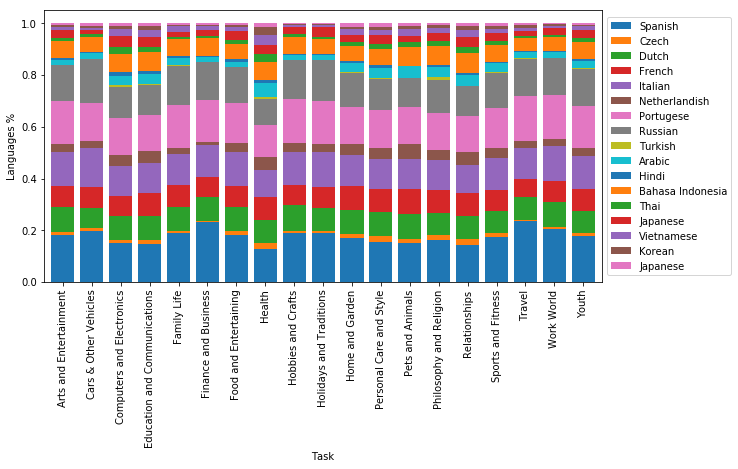

In [142]:

languagelink = [("Español", "Spanish"), ("Čeština","Czech"), ("Deutsch","Dutch"), ("Français","French"), ("Italiano","Italian"), ("Nederlands","Netherlandish"), ("Português","Portugese"), ("Русский","Russian"), ("Türkçe","Turkish"), ("العربية","Arabic"), ("हिन्दी","Hindi"), ("Bahasa Indonesia","Bahasa Indonesia"), ("ไทย","Thai"), ("中文","Japanese"), ("Tiếng Việt","Vietnamese"),  ("한국어","Korean"), ("日本語","Japanese")]
# one_hot = one_hot[one_hot['1'] != "Health"]


# tot1 = one_hot['1'].value_counts()  
# for lang in languagelink:
#     langdata = one_hot.loc[one_hot[lang[0]] == 1]['1'].value_counts()
#     print('\n----------' + lang[1] + '----------\n')
#     divdata = langdata.divide(tot1).fillna(0).sort_values()
# #     divdata.plot.pie()
# #     plt.show()
#     print(divdata.divide(divdata.sum()).multiply(100))


# tot2 = one_hot['2'].value_counts()
# index = list(one_hot.sort_values(by='1')['2'].unique())
# for lang in languagelink:
#     langdata = one_hot.loc[one_hot[lang[0]] == 1]['2'].value_counts()
#     print('\n----------' + lang[1] + '----------\n')
#     divdata = langdata.divide(tot2).fillna(0)
#     divdata.reindex(index)
#     divdata.plot.bar()

divdata = []
plt.rcParams['figure.figsize'] = [10, 5]
# plt.legend(loc=(1.04,0))
tot1 = one_hot['1'].value_counts()  
for lang in languagelink:
    langdata = one_hot.loc[one_hot[lang[0]] == 1]['1'].value_counts()
    divval = langdata.divide(tot1).fillna(0)
    divval.name = lang[1]
#     divval = divval.divide(divval.sum())
    divdata.append(divval)
    
new_data = pd.concat(divdata, axis=1)
new_data = new_data.div(new_data.sum(axis=1), axis=0)
# new_data.head()

new_data.plot(kind='bar', stacked=True, width=0.8)
plt.ylabel("Languages %")
plt.xlabel("Task")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# plt.rcParams['figure.figsize'] = [7, 5]
# tot1 = one_hot['1'].value_counts()
# for lang in languagelink:
#     langdata = one_hot.loc[one_hot[lang[0]] == 1]['1'].value_counts()
#     print('\n----------' + lang[1] + '----------\n')
#     divdata = langdata.divide(tot1).fillna(0)
#     divdata.plot(kind='bar', width=0.9)
#     plt.show()




#     plt.show()
#     break
#     print(divdata)


# for lang in languagelink:
#     langdata = one_hot.loc[one_hot[lang[0]] == 1]['2'].value_counts()
#     print(langdata)